In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import cv2
from numpy import genfromtxt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import sys, os, random
from tqdm import tqdm
from skimage.feature import local_binary_pattern
from skimage import color

In [237]:
label = {
    'normal_unhelmeted':0,
    'helmeted':1,
    'cap':2,
    'bald':3,
    'burkha':4
    
}

# Loading first set of dataframe

In [209]:
x = genfromtxt('../data/hog.csv', delimiter=',')[:,1:]
y = pd.read_csv("../data/label.csv", names=['id','non_helmet'])[['non_helmet']]

In [210]:
y['non_helmet']=y.non_helmet.map(lambda x: label['helmeted'] if x == 'helmet' else label['normal_unhelmeted'])
# y['non_helmet']=y.non_helmet.map(lambda x:1 if x == 'helmet' else 0)

In [211]:
y

,non_helmet
0,0
1,0
2,0
3,0
4,0
...,...
29120,1
29121,1
29122,1
29123,1


In [212]:
n = np.append(x, y, axis = 1)
n = np.unique(n, axis=0)

In [213]:
n

array([[0.        , 0.        , 0.        , ..., 0.2697897 , 0.26690334,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.13782546, 0.11152794,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.03489072, 0.35036   ,
        1.        ],
       ...,
       [0.46200427, 0.01541177, 0.00761054, ..., 0.020271  , 0.13539703,
        1.        ],
       [0.47009906, 0.161956  , 0.08517306, ..., 0.10214558, 0.374855  ,
        1.        ],
       [0.47500736, 0.11118197, 0.03049811, ..., 0.15865491, 0.11624321,
        1.        ]])

# Loading second set of dataframes

In [214]:
x = genfromtxt('../data/hog_2.csv', delimiter=',')[:,1:]
y = pd.read_csv("../data/label_2.csv", names=['id','non_helmet'])[['non_helmet']]

In [215]:
y['non_helmet']=y.non_helmet.map(lambda x: label['helmeted'] if x == 'helmet' else label['normal_unhelmeted'])
# y['non_helmet']=y.non_helmet.map(lambda x:1 if x == 'helmet' else 0)

In [216]:
n1 = np.append(x, y, axis = 1)
n1 = np.unique(n1, axis=0)

In [217]:
n = np.append(n,n1,axis=0)

In [218]:
n = np.unique(n,axis=0) 
pd.Series(n[:,-1]).value_counts()

1.0    1224
0.0     734
dtype: int64

In [219]:
n

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 3.2261476e-02,
        2.5491458e-01, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 6.8351277e-03,
        8.6880280e-04, 0.0000000e+00],
       ...,
       [4.7500736e-01, 1.1118197e-01, 3.0498110e-02, ..., 1.5865491e-01,
        1.1624321e-01, 1.0000000e+00],
       [4.8351760e-01, 1.6326050e-01, 1.7378226e-01, ..., 3.7027678e-01,
        8.0871580e-02, 0.0000000e+00],
       [5.0780195e-01, 1.0185144e-02, 3.0477721e-02, ..., 5.0180927e-03,
        2.4104919e-01, 0.0000000e+00]])

# Loading third set of dataframe

In [220]:
x = genfromtxt('../data/hog_3.csv', delimiter=',')[:,1:]
y = pd.read_csv("../data/label_3.csv", names=['id','non_helmet'])[['non_helmet']]

In [221]:
y['non_helmet']=y.non_helmet.map(lambda x: label['helmeted'] if x == 'helmet' else label['normal_unhelmeted'])
# y['non_helmet']=y.non_helmet.map(lambda x:1 if x == 'helmet' else 0)

In [222]:
n2 = np.append(x, y, axis = 1)
n2 = np.unique(n2, axis=0)

In [223]:
n = np.append(n,n2,axis=0)

In [224]:
n = np.unique(n,axis=0) 
pd.Series(n[:,-1]).value_counts()

1.0    1224
0.0    1047
dtype: int64

# Reading from output cap

In [226]:
x = genfromtxt('../data/output_cap_csv/hog.csv', delimiter=',')[:,1:]
y = pd.read_csv("../data/output_cap_csv/label.csv", names=['id','non_helmet'])[['non_helmet']]

In [227]:
y['non_helmet']=y.non_helmet.map(lambda x: label['helmeted'] if x == 'helmet' else label['cap'])
# y['non_helmet']=y.non_helmet.map(lambda x:1 if x == 'helmet' else 0)

In [228]:
n3 = np.append(x, y, axis = 1)
n3 = np.unique(n3, axis=0)

In [229]:
n = np.append(n,n3,axis=0)

In [230]:
n = np.unique(n,axis=0) 
pd.Series(n[:,-1]).value_counts()

1.0    1224
0.0    1047
2.0     184
dtype: int64

# Reading from output bald

In [232]:
x = genfromtxt('../data/output_bald/hog.csv', delimiter=',')[:,1:]
y = pd.read_csv("../data/output_bald/label.csv", names=['id','non_helmet'])[['non_helmet']]

In [233]:
y['non_helmet']=y.non_helmet.map(lambda x: label['helmeted'] if x == 'helmet' else label['bald'])
# y['non_helmet']=y.non_helmet.map(lambda x:1 if x == 'helmet' else 0)

In [234]:
n4 = np.append(x, y, axis = 1)
n4 = np.unique(n4, axis=0)

In [235]:
n = np.append(n,n4,axis=0)

In [236]:
n = np.unique(n,axis=0) 
pd.Series(n[:,-1]).value_counts()

1.0    1224
0.0    1047
2.0     184
3.0     162
dtype: int64

# Reading from burkha out

In [238]:
x = genfromtxt('../data/burkha_out/hog.csv', delimiter=',')[:,1:]
y = pd.read_csv("../data/burkha_out/label.csv", names=['id','non_helmet'])[['non_helmet']]

In [239]:
y['non_helmet']=y.non_helmet.map(lambda x: label['helmeted'] if x == 'helmet' else label['burkha'])
# y['non_helmet']=y.non_helmet.map(lambda x:1 if x == 'helmet' else 0)

In [240]:
n5 = np.append(x, y, axis = 1)
n5 = np.unique(n5, axis=0)

In [241]:
n = np.append(n,n5,axis=0)

In [242]:
n = np.unique(n,axis=0) 
pd.Series(n[:,-1]).value_counts()

1.0    1224
0.0    1047
2.0     184
3.0     162
4.0     109
dtype: int64

# Delete extra

In [243]:
del n1,n2,n3,n4,n5,x,y

# PCA

In [42]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(n.values[:,:-1])
y = n.values[:,-1]

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [44]:
finalDf = pd.concat([principalDf, pd.Series(y,name='target')], axis = 1)

In [45]:
finalDf

,principal component 1,principal component 2,target
0,-7.139556,4.816591,helmet
1,-8.098833,-0.665206,helmet
2,-10.631636,4.423109,helmet
3,-7.259442,-0.907548,helmet
4,-9.703158,4.725519,helmet
...,...,...,...
3091,-8.300495,0.481217,open_head
3092,-7.964401,1.164428,open_head
3093,-6.173484,2.204851,open_head
3094,-7.403638,1.111528,open_head


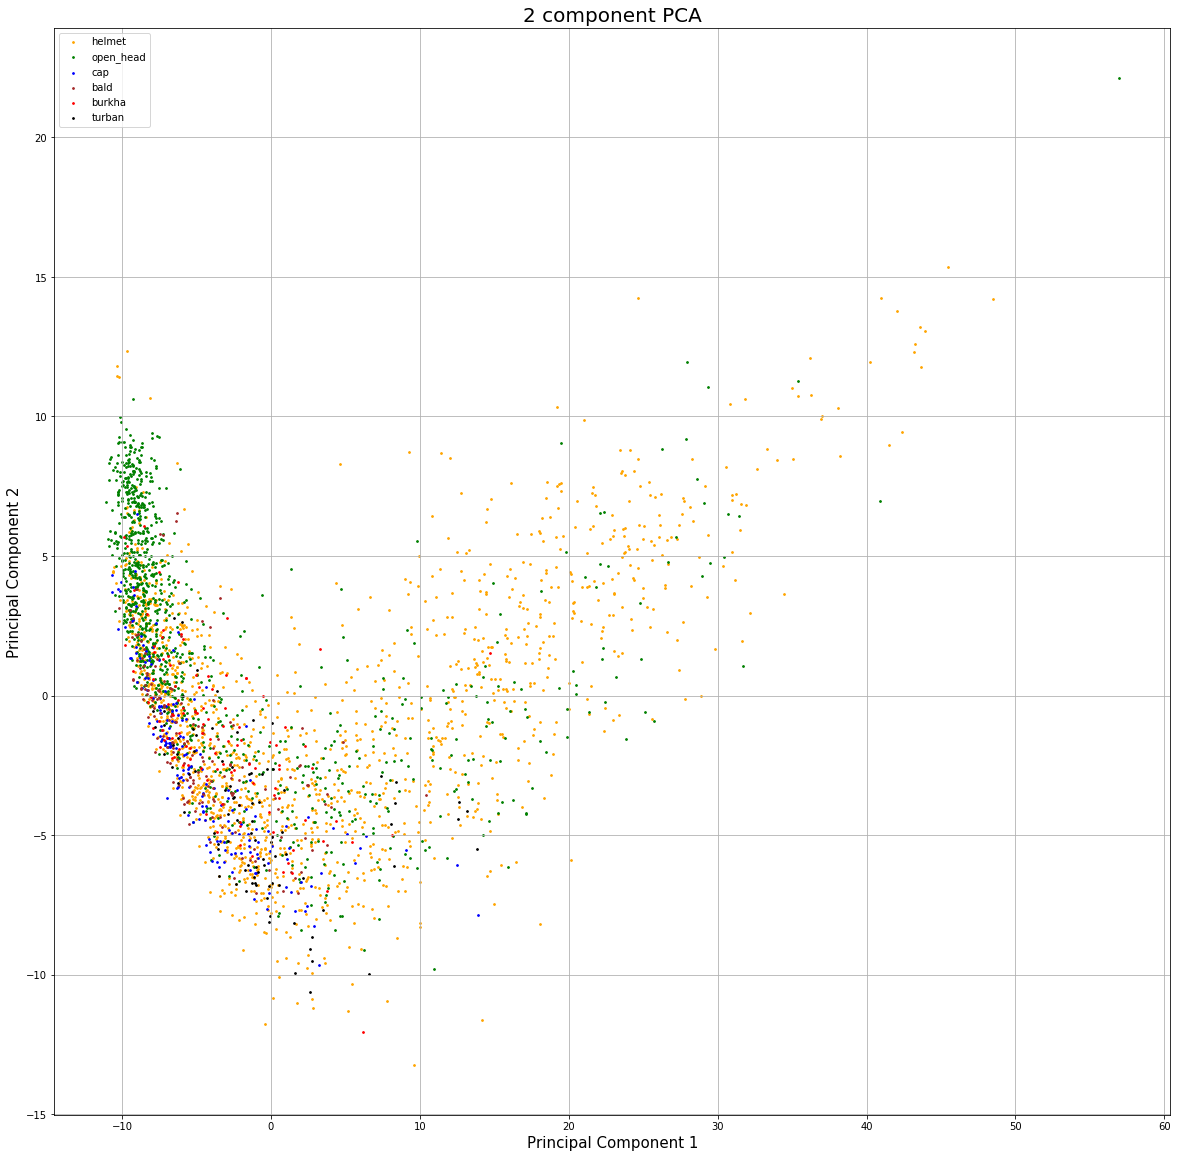

In [47]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['helmet', 'open_head', 'cap', 'bald', 'burkha', 'turban']
colors = ['orange', 'green', 'blue', 'brown', 'red','black']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 3)
ax.legend(targets)
ax.grid()

# Prediction

In [58]:
n = nn

In [53]:
nn = n
n = n[(n.target != 'turban')&(n.target != 'cap')]

In [76]:
n['target'] = n.target.map(lambda x: x if x=='helmet' else 'non')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [78]:
X_train, X_test, y_train, y_test = train_test_split(n.values[:,:-1], n.values[:,-1], test_size=1/5, random_state=42)

In [79]:
model = SVC()
a = model.fit(X_train,y_train)

In [80]:
print(classification_report(y_test,a.predict(X_test)))

              precision    recall  f1-score   support

      helmet       0.70      0.67      0.68       297
         non       0.71      0.73      0.72       323

    accuracy                           0.70       620
   macro avg       0.70      0.70      0.70       620
weighted avg       0.70      0.70      0.70       620



# Test on one image

In [87]:
img = cv2.imread('/Users/betterhalf/Desktop/projects/motorcyle_helmet_detection/helmet_classification/images_for_manual_testing/no-helmet.jpeg')
img = cv2.resize(img,(100,100))
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = local_binary_pattern(img, 8, 1)
hist, _ = np.histogram(img, bins=np.arange(2**8 + 1), density=True)
print(a.predict([hist]))

['non']


# cropping images from annotated csv

In [95]:
op_path = "/Users/betterhalf/Desktop/projects/motorcyle_helmet_detection/data/downloaded_from_google/non_helmet/burkha_output"
images_path = "/Users/betterhalf/Desktop/projects/motorcyle_helmet_detection/data/downloaded_from_google/non_helmet/burkha"
csv_path = "/Users/betterhalf/Desktop/projects/motorcyle_helmet_detection/data/downloaded_from_google/via_export_csv_bukha.csv"

In [96]:
all_boxes = pd.read_csv(csv_path)

In [97]:
import os  
ct = 0 
for row in all_boxes.iterrows():
    row = row[1]
    img = cv2.imread(os.path.join(images_path,row.filename))
    att = eval(row.region_shape_attributes)
    y = att['y']
    x = att['x']
    h = att['height']
    w = att['width']
    n_img = img[y:y+h, x:x+w]
    cv2.imwrite(os.path.join(op_path,str(ct)+str(row.filename)),n_img)
    ct+=1

In [58]:
all_boxes

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,download (1).jpeg,11955,{},4,0,"{""name"":""rect"",""x"":119,""y"":65,""width"":69,""heig...",{}
1,download (1).jpeg,11955,{},4,1,"{""name"":""rect"",""x"":2,""y"":69,""width"":66,""height...",{}
2,download (1).jpeg,11955,{},4,2,"{""name"":""rect"",""x"":197,""y"":44,""width"":63,""heig...",{}
3,download (1).jpeg,11955,{},4,3,"{""name"":""rect"",""x"":67,""y"":20,""width"":51,""heigh...",{}
4,download (2).jpeg,15713,{},10,0,"{""name"":""rect"",""x"":139,""y"":91,""width"":27,""heig...",{}
...,...,...,...,...,...,...,...
179,images.jpeg,10629,{},10,5,"{""name"":""rect"",""x"":44,""y"":23,""width"":36,""heigh...",{}
180,images.jpeg,10629,{},10,6,"{""name"":""rect"",""x"":274,""y"":8,""width"":28,""heigh...",{}
181,images.jpeg,10629,{},10,7,"{""name"":""rect"",""x"":132,""y"":72,""width"":60,""heig...",{}
182,images.jpeg,10629,{},10,8,"{""name"":""rect"",""x"":130,""y"":21,""width"":36,""heig...",{}


# Loading images directly as pixel values csv

In [37]:
path = '/Users/betterhalf/Desktop/projects/motorcyle_helmet_detection/data/helmet_classification/dataset'
tot_hog=[]
tot_label=[]
df = []
df1 = []
for subdir, dirs, files in os.walk(path):
    try:
        label =subdir.split('/')[-1].split('-')[1]
        print(subdir)
    except:
        continue
    for file in tqdm(files):
        #print(os.path.join(path,label, file))
    
        #print(file)
        input_path = os.path.join(subdir, file)
#         print(input_path)
        img = cv2.imread(input_path)
        #print (img)
        if img is None:
            continue
        img = cv2.resize(img,(100,100))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#         d = cv2.HOGDescriptor()
#         hog = d.compute(img)
#         transpose_hog= hog.transpose()
#         print(transpose_hog)
#         df = pd.DataFrame(transpose_hog)
        img = local_binary_pattern(img, 8, 1)
        hist, _ = np.histogram(img, bins=np.arange(2**8 + 1), density=True)
        df.append(list(hist))
        df1.append(list([label]))
df = pd.DataFrame(df)
df1  = pd.DataFrame(df1)

 15%|█▌        | 46/297 [00:00<00:00, 453.70it/s]

/Users/betterhalf/Desktop/projects/motorcyle_helmet_detection/data/helmet_classification/dataset/e2-helmet


  8%|▊         | 36/427 [00:00<00:01, 355.96it/s]

/Users/betterhalf/Desktop/projects/motorcyle_helmet_detection/data/helmet_classification/dataset/dataturks/dataturk-open_head


  4%|▍         | 35/896 [00:00<00:02, 344.11it/s]

/Users/betterhalf/Desktop/projects/motorcyle_helmet_detection/data/helmet_classification/dataset/dataturks/dataturk-helmet


 24%|██▍       | 44/185 [00:00<00:00, 431.08it/s]

/Users/betterhalf/Desktop/projects/motorcyle_helmet_detection/data/helmet_classification/dataset/crop-cap


 16%|█▌        | 48/306 [00:00<00:00, 471.18it/s]

/Users/betterhalf/Desktop/projects/motorcyle_helmet_detection/data/helmet_classification/dataset/e3-open_head


 28%|██▊       | 44/160 [00:00<00:00, 431.04it/s]

/Users/betterhalf/Desktop/projects/motorcyle_helmet_detection/data/helmet_classification/dataset/crop-bald


 96%|█████████▌| 87/91 [00:00<00:00, 436.10it/s]

/Users/betterhalf/Desktop/projects/motorcyle_helmet_detection/data/helmet_classification/dataset/crop-turban


 14%|█▍        | 45/318 [00:00<00:00, 441.20it/s]

/Users/betterhalf/Desktop/projects/motorcyle_helmet_detection/data/helmet_classification/dataset/google-helmet


 42%|████▏     | 46/109 [00:00<00:00, 453.94it/s]

/Users/betterhalf/Desktop/projects/motorcyle_helmet_detection/data/helmet_classification/dataset/crop-burkha


 14%|█▍        | 45/313 [00:00<00:00, 448.11it/s]

/Users/betterhalf/Desktop/projects/motorcyle_helmet_detection/data/helmet_classification/dataset/e1-open_head


100%|██████████| 313/313 [00:00<00:00, 445.00it/s]


In [38]:
df.to_csv('hog_lbph.csv', mode ='a',header = False)
df1.to_csv('label_lbph.csv',mode = 'a', header = False)

In [56]:
n = pd.DataFrame(pd.read_csv("hog.csv").values[:,1:])

In [57]:
n1 = pd.Series(pd.read_csv("label.csv").values[:,-1])

In [41]:
n = df
del df
n['target'] = df1[0]
n = n.drop_duplicates()
n

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,target
0,0.0037,0.0042,0.0,0.0012,0.0054,0.0004,0.0018,0.0322,0.0000,0.0000,...,0.0095,0.0095,0.0057,0.0,0.0035,0.0049,0.0050,0.0026,0.1794,helmet
1,0.0030,0.0048,0.0,0.0023,0.0069,0.0002,0.0028,0.0336,0.0002,0.0000,...,0.0013,0.0204,0.0060,0.0,0.0055,0.0035,0.0009,0.0040,0.0183,helmet
2,0.0010,0.0013,0.0,0.0003,0.0041,0.0000,0.0004,0.0203,0.0000,0.0000,...,0.0023,0.0222,0.0049,0.0,0.0026,0.0040,0.0039,0.0008,0.0336,helmet
3,0.0038,0.0054,0.0,0.0027,0.0040,0.0004,0.0016,0.0304,0.0000,0.0000,...,0.0015,0.0219,0.0047,0.0,0.0040,0.0079,0.0020,0.0064,0.0227,helmet
4,0.0018,0.0022,0.0,0.0015,0.0043,0.0000,0.0011,0.0315,0.0000,0.0001,...,0.0062,0.0118,0.0053,0.0,0.0022,0.0054,0.0060,0.0018,0.0561,helmet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3093,0.0028,0.0063,0.0,0.0026,0.0041,0.0002,0.0019,0.0238,0.0000,0.0000,...,0.0020,0.0175,0.0060,0.0,0.0041,0.0063,0.0020,0.0051,0.0225,open_head
3094,0.0041,0.0069,0.0,0.0019,0.0029,0.0001,0.0025,0.0288,0.0000,0.0000,...,0.0072,0.0116,0.0045,0.0,0.0020,0.0059,0.0055,0.0045,0.0785,open_head
3095,0.0050,0.0048,0.0,0.0031,0.0096,0.0003,0.0027,0.0279,0.0000,0.0000,...,0.0089,0.0136,0.0052,0.0,0.0061,0.0034,0.0050,0.0030,0.1268,open_head
3096,0.0023,0.0085,0.0,0.0023,0.0041,0.0004,0.0015,0.0302,0.0000,0.0002,...,0.0022,0.0164,0.0041,0.0,0.0031,0.0065,0.0040,0.0090,0.0286,open_head


In [10]:
img = cv2.imread("/Users/betterhalf/Desktop/projects/motorcyle_helmet_detection/helmet_classification/images_for_manual_testing/no-helmet.jpeg")
img = color.rgb2gray(img)
cv2.imshow('lbp',patterns)
cv2.waitKey()

27

# Pickle dumper

In [89]:
import pickle
with open("svm_model.pickle",'wb') as handle:
    pickle.dump(a,handle)